## Analytical Playground 
this notebook is designed to 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import pickle
from pathlib import Path

# Define the file path
file_path = Path("outputs") / "markets_2025-05-06.pkl"

with open(file_path, 'rb') as f:
    data = pickle.load(f)
    df = pd.DataFrame(data)
    
df

,Id,PackageId,MarketId,ClientProvidersSettingId,SportId,LocationId,LeagueId,FixtureId,IsInPlay,Margin,...,SuspensionRangeMinPrice,SuspensionRangeMaxPrice,OutOfRangeSuspensionBehaviour,OddsLadderId,TemplateId,TimeFrameId,MaxNumberOfLines,MarginTypeId,MinCompetitiveMarginCap,MaxCompetitiveMarginCap
0,2221,6,1,437,6046,78,0,0,1,7.0,...,1.100,100.0,1,0,-1,None,0,2,1.0,25.0
1,2222,6,419,437,6046,78,0,0,1,7.0,...,1.100,100.0,1,0,-1,None,0,2,1.0,25.0
2,2228,6,1,759,6046,0,0,0,1,-1.0,...,1.100,100.0,1,0,-1,None,0,1,1.0,25.0
3,2230,6,6,759,6046,0,0,0,1,-1.0,...,1.100,100.0,1,0,-1,None,0,1,1.0,25.0
4,2316,6,159,444,54094,0,0,0,1,7.0,...,1.100,100.0,1,0,-1,None,0,2,1.0,25.0
5,2317,6,166,444,54094,0,0,0,1,7.0,...,1.100,100.0,1,0,-1,None,0,2,1.0,25.0
6,2318,6,52,444,54094,0,0,0,1,-1.0,...,1.100,100.0,1,0,-1,None,0,1,1.0,25.0
7,2485,5,52,11703,1149093,0,0,0,0,5.5,...,1.001,5000.0,1,0,-1,None,0,2,1.0,25.0
8,2506,5,1,439,46957,0,0,0,0,-2.0,...,1.001,5000.0,1,0,-1,None,0,1,1.0,25.0
9,2507,5,3,439,46957,0,0,0,0,-2.0,...,1.001,5000.0,1,0,-1,None,0,1,1.0,25.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Id                             10 non-null     int64         
 1   PackageId                      10 non-null     int64         
 2   MarketId                       10 non-null     int64         
 3   ClientProvidersSettingId       10 non-null     int64         
 4   SportId                        10 non-null     int64         
 5   LocationId                     10 non-null     int64         
 6   LeagueId                       10 non-null     int64         
 7   FixtureId                      10 non-null     int64         
 8   IsInPlay                       10 non-null     int64         
 9   Margin                         10 non-null     float64       
 10  MinimumDifference              10 non-null     float64       
 11  LineTypes             

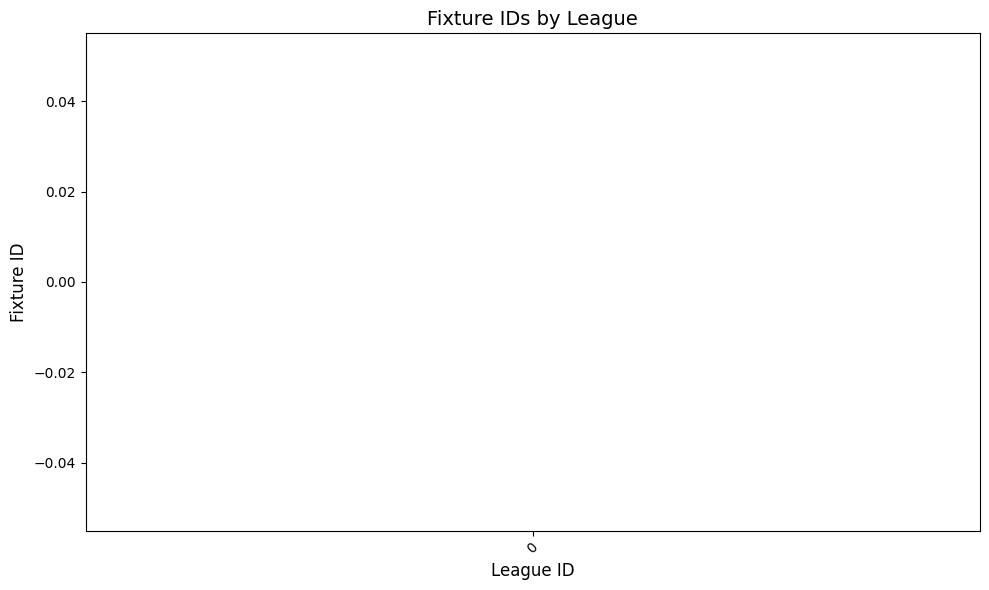

In [3]:
# Create a bar plot showing FixtureId counts by LeagueId
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LeagueId', y='FixtureId', data=df, alpha=0.7)

# Customize the plot
plt.title('Fixture IDs by League', fontsize=14)
plt.xlabel('League ID', fontsize=12)
plt.ylabel('Fixture ID', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
